In [10]:
import networkx as nx
import matplotlib.pyplot as plt
from time import time
from networkx.drawing.nx_agraph import graphviz_layout

In [11]:
ITERATION = 3
SIZE = 10

def gen_points(c):
    return [str(time())+str(time()/2) for _ in range(c)]

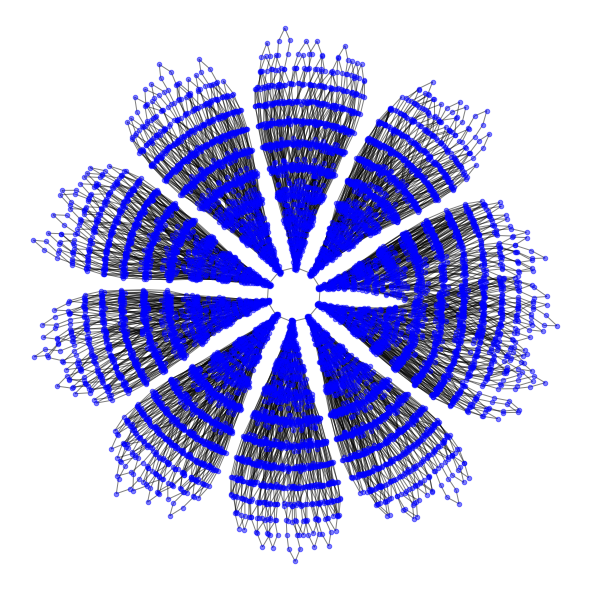

In [12]:
points = gen_points(SIZE)
G = nx.Graph()
G.add_nodes_from(points)
i = 0
while i < len(points) - 1:
    G.add_edge(points[i], points[i + 1])
    i += 1
G.add_edge(points[0], points[-1])

for iteration in range(ITERATION):
    min_degrees = set(sorted(set(val for (_, val) in G.degree()))[:2])
    nodes = list(filter(lambda x: x[1] in min_degrees, G.degree()))
    for name, val in nodes:
        new_points_list = gen_points(SIZE)
        new_points_list[0] = name
        i = 0
        while i < len(new_points_list) - 1:
            G.add_edge(new_points_list[i], new_points_list[i + 1])
            i += 1
        G.add_edge(new_points_list[0], new_points_list[-1])

pos = graphviz_layout(G, prog="neato", args="")
plt.figure(figsize=(8, 8))
nx.draw(G, pos, node_size=20, alpha=0.5, node_color="blue", with_labels=False)
plt.axis("equal")
plt.show()